### Check Corona Vaccinations 
version 0.4

* [this Notebook](https://github.com/salgo60/CoronaVaccinationCheck/blob/master/Check%20Corona%20Vaccination.ipynb) / [repository](https://github.com/salgo60/CoronaVaccinationCheck) 

* read the data on [github.com/owid/covid-19-data...vaccinations/country_data](https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations/country_data)
  * Data is reported cummulated for United Kingdom but also subnational data England, Scotland, Northern Ireland, Wales see [issue 228](https://github.com/owid/covid-19-data/issues/228)
     * subnational data have been published quite irregularly so far ==> we filter them out

In [1]:
from datetime import datetime
start_time  = datetime.now()
print("Last run: ", start_time)

Last run:  2020-12-27 18:33:25.036681


In [2]:
import pandas as pd
GITHUB_directory = "https://api.github.com/repos/owid/covid-19-data/contents/public/data/vaccinations/country_data"  
countries = pd.read_json(GITHUB_directory)  
listcountries = []
for index,row in countries.iterrows():
    df = pd.read_csv(row["download_url"])
    listcountries.append(df)
    
allCountries = pd.concat(listcountries, axis=0, ignore_index=True)    

In [3]:
# Show 15 latest sorted by dates
allCountries.sort_values(by=['date'],ascending=False)[0:15]

,location,date,vaccine,total_vaccinations,source_url
27,Israel,2020-12-26,Pfizer/BioNTech,279300,https://www.gov.il/he/departments/news/2712202...
3,Bahrain,2020-12-26,Sinopharm,51556,https://twitter.com/MOH_Bahrain/status/1342912...
43,United States,2020-12-26,"Moderna, Pfizer/BioNTech",1944585,https://covid.cdc.gov/covid-data-tracker/#vacc...
17,Chile,2020-12-26,Pfizer/BioNTech,8324,https://deis.minsal.cl/
2,Bahrain,2020-12-25,Sinopharm,50543,https://twitter.com/MOH_Bahrain/status/1342560...
16,Chile,2020-12-25,Pfizer/BioNTech,5188,https://deis.minsal.cl/
34,Russia,2020-12-25,Sputnik V,700000,https://tass.com/world/1240003
26,Israel,2020-12-25,Pfizer/BioNTech,247300,https://www.gov.il/he/departments/news/2712202...
25,Israel,2020-12-24,Pfizer/BioNTech,208600,https://www.gov.il/he/departments/news/2712202...
15,Chile,2020-12-24,Pfizer/BioNTech,420,https://deis.minsal.cl/


In [4]:
#Countries in list
allCountries["location"].value_counts()

Canada              11
Israel               7
United States        5
Russia               4
Bahrain              4
Chile                3
Wales                2
United Kingdom       2
Scotland             2
Northern Ireland     2
China                1
Costa Rica           1
England              1
Mexico               1
Name: location, dtype: int64

In [5]:
allCountries.groupby(["location", "vaccine"]).size()

location          vaccine                 
Bahrain           Sinopharm                    4
Canada            Pfizer/BioNTech             11
Chile             Pfizer/BioNTech              3
China             CNBG, Sinovac                1
Costa Rica        Pfizer/BioNTech              1
England           Pfizer/BioNTech              1
Israel            Pfizer/BioNTech              7
Mexico            Pfizer/BioNTech              1
Northern Ireland  Pfizer/BioNTech              2
Russia            Sputnik V                    4
Scotland          Pfizer/BioNTech              2
United Kingdom    Pfizer/BioNTech              2
United States     Moderna, Pfizer/BioNTech     2
                  Pfizer/BioNTech              3
Wales             Pfizer/BioNTech              2
dtype: int64

In [6]:
allCountries['date'] = allCountries['date'].astype('datetime64[ns]')   

# Filter away Wales , England, Scotland see above and [issue 228](https://github.com/owid/covid-19-data/issues/228)
list_of_countries_to_delete = ["England","Northern Ireland","Scotland","Wales"]

allCountriesFiltered = allCountries[~allCountries["location"].isin(list_of_countries_to_delete)]
allCountriesFiltered.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 0 to 43
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   location            39 non-null     object        
 1   date                39 non-null     datetime64[ns]
 2   vaccine             39 non-null     object        
 3   total_vaccinations  39 non-null     int64         
 4   source_url          39 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.8+ KB


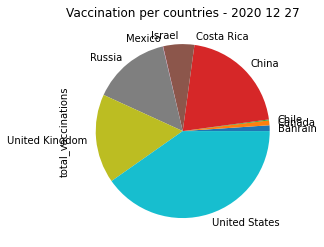

In [7]:
#Countries
%matplotlib inline    
import matplotlib.pyplot as plt   

#Reported numbers are accumulated --> get latest
plotCountries = allCountriesFiltered.sort_values(by=['date'],ascending=False) \
    [['total_vaccinations','location','vaccine']].groupby('location').apply(lambda x: x.head(1))
plotCountries = plotCountries.set_index('location')
plotCountries["total_vaccinations"].plot( y='location',kind = 'pie') 
plt.title("Vaccination per countries - " + start_time.strftime('%Y %m %d'))
plt.savefig('Corona_VaccinationperCountry.png')  
plt.show() 


In [8]:
plotCountries.sort_values(by='total_vaccinations',ascending=True)

,total_vaccinations,vaccine
location,,
Costa Rica,55,Pfizer/BioNTech
Mexico,2924,Pfizer/BioNTech
Chile,8324,Pfizer/BioNTech
Canada,43525,Pfizer/BioNTech
Bahrain,51556,Sinopharm
Israel,279300,Pfizer/BioNTech
Russia,700000,Sputnik V
United Kingdom,800000,Pfizer/BioNTech
China,1000000,"CNBG, Sinovac"


In [9]:
plotCountries.sum()

total_vaccinations                                              4830269
vaccine               SinopharmPfizer/BioNTechPfizer/BioNTechCNBG, S...
dtype: object

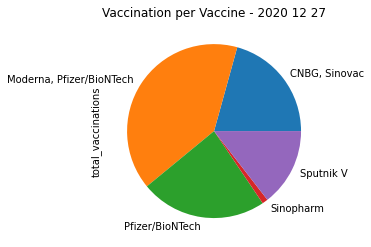

In [10]:
# Vaccine numbers
plotVaccine = plotCountries.groupby('vaccine')['total_vaccinations'].sum()
plotVaccine.plot( kind = 'pie') 
plt.title("Vaccination per Vaccine - " + start_time.strftime('%Y %m %d'))
plt.savefig('Corona_VaccinationperVaccine.png')  
plt.show()

In [11]:
plotVaccine.sort_values(ascending=True)

vaccine
Sinopharm                     51556
Sputnik V                    700000
CNBG, Sinovac               1000000
Pfizer/BioNTech             1134128
Moderna, Pfizer/BioNTech    1944585
Name: total_vaccinations, dtype: int64

In [12]:
# Sweden have 10 000 doses....

In [13]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2020-12-27 18:33:29.712285
Time elapsed (hh:mm:ss.ms) 0:00:04.676177


### Whole dataset
see 
* [COVID-19 Data Processing Pipelines and datasets](https://github.com/covid19-data/covid19-data)

### Compare population
* using data from Wikidata
* "translates" the labels to Wikidata Qnumber see reconciliationCountries_dict 

In [14]:
reconciliationCountries_dict = {
    "Bahrain" : "Q398", "Belarus" : "Q184","Canada" : "Q16",    "China" : "Q148",
    "Chile" : "Q298", "Costa Rica" : "Q800", "Israel" : "Q801", "Mexico" : "Q96",
    "France" : "Q142","Germany" : "Q183",
    "Russia" : "Q159","United Kingdom" : "Q145", "United States" : "Q30",
    "Hungary": "Q28"}
reconciliationCountries = pd.DataFrame.from_dict([reconciliationCountries_dict]).T
reconciliationCountries.columns = ["WD"]
reconciliationCountries.index.name = "Country"

In [15]:
import sys,json
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"
 
# https://w.wiki/s8F
queryWD = """SELECT DISTINCT (SAMPLE(?memberEU) AS ?memberEU) ?country (REPLACE(STR(?country), ".*Q", "Q") AS ?qid) ?countryLabel ?population ?ISO3166_1 ?nominalGDPperCapita ?PPP_GDP_per_capita ?Human_Development_Index WHERE {
  ?country wdt:P31 wd:Q3624078;
    wdt:P1082 ?population.
  OPTIONAL { ?country wdt:P298 ?ISO3166_1. }
  OPTIONAL { ?country wdt:P2132 ?nominalGDPperCapita. }
  OPTIONAL { ?country wdt:P2299 ?PPP_GDP_per_capita. }
  OPTIONAL { ?country wdt:P1081 ?Human_Development_Index. }
  BIND (exists{?country wdt:P463 wd:Q458} AS ?memberEU)
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}
GROUP BY ?population ?countryLabel ?country ?ISO3166_1 ?nominalGDPperCapita ?PPP_GDP_per_capita ?Human_Development_Index"""

def get_sparql_dataframe(endpoint_url, query):
    """
    Helper function to convert SPARQL results into a Pandas data frame.
    """
    user_agent = "salgo60/%s.%s" % (sys.version_info[0], sys.version_info[1])
 
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    result = sparql.query()

    processed_results = json.load(result.response)
    cols = processed_results['head']['vars']

    out = []
    for row in processed_results['results']['bindings']:
        item = []
        for c in cols:
            item.append(row.get(c, {}).get('value'))
        out.append(item)

    return pd.DataFrame(out, columns=cols)

WDpopulation = get_sparql_dataframe(endpoint_url, queryWD)
WDpopulation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   memberEU                 195 non-null    object
 1   country                  195 non-null    object
 2   qid                      195 non-null    object
 3   countryLabel             195 non-null    object
 4   population               195 non-null    object
 5   ISO3166_1                195 non-null    object
 6   nominalGDPperCapita      191 non-null    object
 7   PPP_GDP_per_capita       185 non-null    object
 8   Human_Development_Index  186 non-null    object
dtypes: object(9)
memory usage: 13.8+ KB


In [16]:
#plotCountries

In [17]:
plotCountriesPopulation = pd.merge(plotCountries, reconciliationCountries,how='outer', left_index=True, right_index=True,indicator=True)   
plotCountriesPopulation

,total_vaccinations,vaccine,WD,_merge
Bahrain,51556.0,Sinopharm,Q398,both
Belarus,NaN,NaN,Q184,right_only
Canada,43525.0,Pfizer/BioNTech,Q16,both
Chile,8324.0,Pfizer/BioNTech,Q298,both
China,1000000.0,"CNBG, Sinovac",Q148,both
Costa Rica,55.0,Pfizer/BioNTech,Q800,both
France,NaN,NaN,Q142,right_only
Germany,NaN,NaN,Q183,right_only
Hungary,NaN,NaN,Q28,right_only
Israel,279300.0,Pfizer/BioNTech,Q801,both


## New countries

In [18]:
#Missing
WDmissing = plotCountriesPopulation[plotCountriesPopulation["_merge"] == "left_only"].copy()
WDmissing

,total_vaccinations,vaccine,WD,_merge


In [19]:
del plotCountriesPopulation['_merge']


In [20]:
plotCountriesPopulation = pd.merge(plotCountries, reconciliationCountries,how='inner', left_index=True, right_index=True)  
#WDpopulation.sample(5)

In [21]:
CountriesData = pd.merge(plotCountriesPopulation, WDpopulation,how='inner', left_on='WD', right_on='qid',indicator=True)   
CountriesData = CountriesData.set_index('countryLabel')
CountriesData


,total_vaccinations,vaccine,WD,memberEU,country,qid,population,ISO3166_1,nominalGDPperCapita,PPP_GDP_per_capita,Human_Development_Index,_merge
countryLabel,,,,,,,,,,,,
Bahrain,51556,Sinopharm,Q398,false,http://www.wikidata.org/entity/Q398,Q398,1492584,BHR,23739,47708.055,0.824,both
Canada,43525,Pfizer/BioNTech,Q16,false,http://www.wikidata.org/entity/Q16,Q16,37894799,CAN,44870,46509.717,0.926,both
Chile,8324,Pfizer/BioNTech,Q298,false,http://www.wikidata.org/entity/Q298,Q298,18054726,CHL,15346,24747.307,0.832,both
People's Republic of China,1000000,"CNBG, Sinovac",Q148,false,http://www.wikidata.org/entity/Q148,Q148,1409517397,CHN,8826,16842.408,0.752,both
Costa Rica,55,Pfizer/BioNTech,Q800,false,http://www.wikidata.org/entity/Q800,Q800,4905769,CRI,11677,17109.751,0.794,both
Israel,279300,Pfizer/BioNTech,Q801,false,http://www.wikidata.org/entity/Q801,Q801,9093000,ISR,40543,38867.762,0.899,both
Mexico,2924,Pfizer/BioNTech,Q96,false,http://www.wikidata.org/entity/Q96,Q96,130526945,MEX,8910,18655.922,0.756,both
Russia,700000,Sputnik V,Q159,false,http://www.wikidata.org/entity/Q159,Q159,146804372,RUS,10749,25763.259,0.816,both
United Kingdom,800000,Pfizer/BioNTech,Q145,true,http://www.wikidata.org/entity/Q145,Q145,66022273,GBR,39953,44920.452,0.922,both


In [22]:
#del CountriesData['country']
#del CountriesData['qid']
#del CountriesData['_merge']

CountriesData['population'] = CountriesData['population'].astype(int)
CountriesData['nominalGDPperCapita'] = CountriesData['nominalGDPperCapita'].astype(int)
CountriesData['PPP_GDP_per_capita'] = CountriesData['PPP_GDP_per_capita'].astype(float)
CountriesData['Human_Development_Index'] = CountriesData['Human_Development_Index'].astype(float)
CountriesData["memberEU"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['memberEU'] = CountriesData['memberEU'].astype(int)

CountriesData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Bahrain to United States of America
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   total_vaccinations       10 non-null     int64   
 1   vaccine                  10 non-null     object  
 2   WD                       10 non-null     object  
 3   memberEU                 10 non-null     int64   
 4   country                  10 non-null     object  
 5   qid                      10 non-null     object  
 6   population               10 non-null     int64   
 7   ISO3166_1                10 non-null     object  
 8   nominalGDPperCapita      10 non-null     int64   
 9   PPP_GDP_per_capita       10 non-null     float64 
 10  Human_Development_Index  10 non-null     float64 
 11  _merge                   10 non-null     category
dtypes: category(1), float64(2), int64(4), object(5)
memory usage: 1.0+ KB


In [23]:
CountriesData

,total_vaccinations,vaccine,WD,memberEU,country,qid,population,ISO3166_1,nominalGDPperCapita,PPP_GDP_per_capita,Human_Development_Index,_merge
countryLabel,,,,,,,,,,,,
Bahrain,51556,Sinopharm,Q398,0,http://www.wikidata.org/entity/Q398,Q398,1492584,BHR,23739,47708.055,0.824,both
Canada,43525,Pfizer/BioNTech,Q16,0,http://www.wikidata.org/entity/Q16,Q16,37894799,CAN,44870,46509.717,0.926,both
Chile,8324,Pfizer/BioNTech,Q298,0,http://www.wikidata.org/entity/Q298,Q298,18054726,CHL,15346,24747.307,0.832,both
People's Republic of China,1000000,"CNBG, Sinovac",Q148,0,http://www.wikidata.org/entity/Q148,Q148,1409517397,CHN,8826,16842.408,0.752,both
Costa Rica,55,Pfizer/BioNTech,Q800,0,http://www.wikidata.org/entity/Q800,Q800,4905769,CRI,11677,17109.751,0.794,both
Israel,279300,Pfizer/BioNTech,Q801,0,http://www.wikidata.org/entity/Q801,Q801,9093000,ISR,40543,38867.762,0.899,both
Mexico,2924,Pfizer/BioNTech,Q96,0,http://www.wikidata.org/entity/Q96,Q96,130526945,MEX,8910,18655.922,0.756,both
Russia,700000,Sputnik V,Q159,0,http://www.wikidata.org/entity/Q159,Q159,146804372,RUS,10749,25763.259,0.816,both
United Kingdom,800000,Pfizer/BioNTech,Q145,1,http://www.wikidata.org/entity/Q145,Q145,66022273,GBR,39953,44920.452,0.922,both


In [24]:
CountriesData['Country'] = CountriesData.index

In [25]:
CountriesData["vaccinations_population_percent"] = CountriesData["total_vaccinations"]/CountriesData["population"] * 100

correlations = CountriesData.corr()  
correlations["total_vaccinations"]

total_vaccinations                 1.000000
memberEU                           0.174625
population                         0.471720
nominalGDPperCapita                0.489095
PPP_GDP_per_capita                 0.432922
Human_Development_Index            0.296177
vaccinations_population_percent   -0.107047
Name: total_vaccinations, dtype: float64

In [26]:
correlations["vaccinations_population_percent"]

total_vaccinations                -0.107047
memberEU                           0.082987
population                        -0.289380
nominalGDPperCapita                0.291333
PPP_GDP_per_capita                 0.475917
Human_Development_Index            0.285060
vaccinations_population_percent    1.000000
Name: vaccinations_population_percent, dtype: float64

In [29]:
# see https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
import seaborn as sns
#plt.rcParams['figure.figsize'] = (8.0, 8.0)
#heatmap = sns.heatmap(correlations, vmin=-1, vmax=1, annot=True)
#heatmap.set_title('Corona vaccinations Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


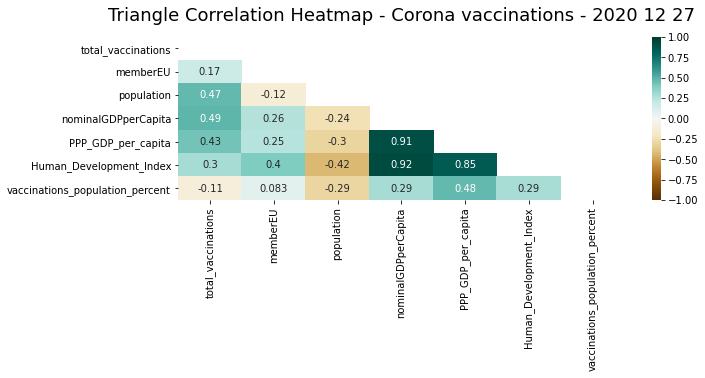

In [30]:
import numpy as np
plt.figure(figsize=(10, 3))
np.triu(np.ones_like(correlations))
mask = np.triu(np.ones_like(correlations, dtype=np.bool))
heatmap = sns.heatmap(correlations, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap - Corona vaccinations - ' + start_time.strftime('%Y %m %d'), fontdict={'fontsize':18}, pad=16);
plt.savefig('Correlation_heatmap.png', dpi=300, bbox_inches='tight')

In [31]:
CountriesData = CountriesData.sort_values(by=['vaccinations_population_percent'],ascending=False)
CountriesData[{"total_vaccinations","population","vaccinations_population_percent"}]

,total_vaccinations,vaccinations_population_percent,population
countryLabel,,,
Bahrain,51556,3.454144,1492584
Israel,279300,3.071594,9093000
United Kingdom,800000,1.211712,66022273
United States of America,1944585,0.592429,328239523
Russia,700000,0.476825,146804372
Canada,43525,0.114857,37894799
People's Republic of China,1000000,0.070946,1409517397
Chile,8324,0.046104,18054726
Mexico,2924,0.002240,130526945


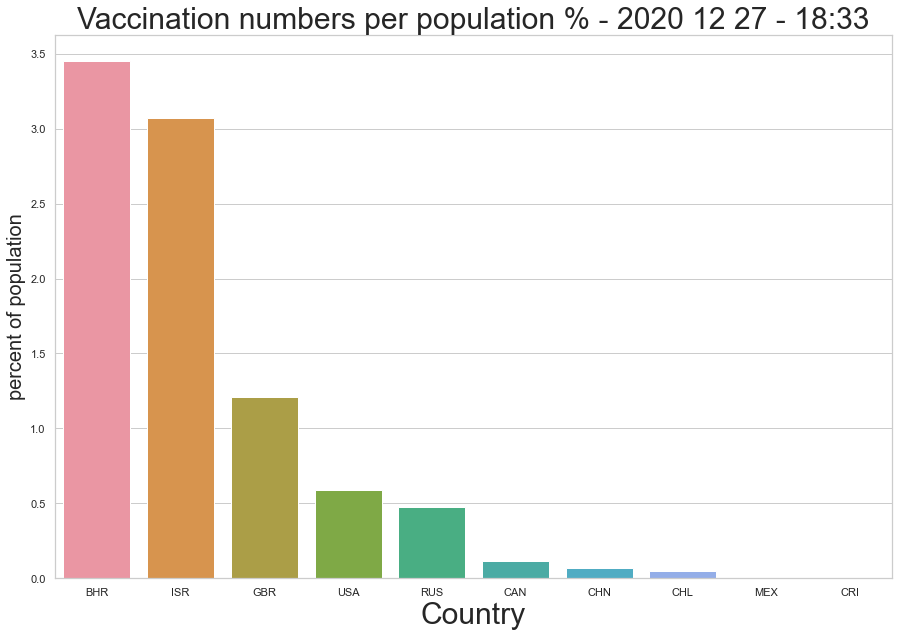

In [32]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData). \
            set_title("Vaccination numbers per population % - " + start_time.strftime('%Y %m %d - %-H:%M'),fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Country",fontsize=30)
plt.savefig("Corona_VaccinationperCountryPopulation_sns_2.png")